In [1]:
import pandas as pd
import csv

# basic plotting and data manipulation
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from cycler import cycler

# For modeling
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans

# Update matplotlib defaults to something nicer
mpl_update = {
    'font.size': 16,
    'axes.prop_cycle': cycler('color', ['#edd5a6','#0085ca', '#888b8d', '#00c389', '#f4364c', '#e56db1']),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'figure.figsize': [12.0, 8.0],
    'axes.labelsize': 20,
    'axes.labelcolor': '#677385',
    'axes.titlesize': 20,
    'lines.color': '#0055A7',
    'lines.linewidth': 3,
    'text.color': '#677385',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Tahoma'
}
mpl.rcParams.update(mpl_update)

## Load data

In [2]:
data = pd.read_csv('merged_data_cleaned.csv')
data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [3]:
filtered_records = pd.read_csv('merged_data_cleaned.csv',
                               usecols=['Unnamed: 0', 'Species', 'Owner.1',
                                        'Country.of.Origin', 'Farm.Name', 'Company',
                                        'Region', 'Producer', 'Grading.Date', 
                                        'Processing.Method', 'Aroma', 'Flavor',
                                        'Aftertaste', 'Acidity', 'Body',
                                        'Balance', 'Uniformity', 'Clean.Cup',
                                        'Sweetness', 'Total.Cup.Points',
                                        'Moisture','Color'])

In [4]:
filtered_records = filtered_records.rename(columns={'Unnamed: 0': 'id'})
filtered_records

,id,Species,Country.of.Origin,Farm.Name,Company,Region,Producer,Grading.Date,Owner.1,Processing.Method,...,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color
0,0,Arabica,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,"April 4th, 2015",metad plc,Washed / Wet,...,8.67,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green
1,1,Arabica,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,"April 4th, 2015",metad plc,Washed / Wet,...,8.50,8.58,8.42,8.42,10.00,10.00,10.00,89.92,0.12,Green
2,2,Arabica,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,"May 31st, 2010",Grounds for Health Admin,NaN,...,8.42,8.42,8.33,8.42,10.00,10.00,10.00,89.75,0.00,NaN
3,3,Arabica,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,"March 26th, 2015",Yidnekachew Dabessa,Natural / Dry,...,8.42,8.42,8.50,8.25,10.00,10.00,10.00,89.00,0.11,Green
4,4,Arabica,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,"April 4th, 2015",metad plc,Washed / Wet,...,8.25,8.50,8.42,8.33,10.00,10.00,10.00,88.83,0.12,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,Ecuador,robustasa,robustasa,"san juan, playas",Café Robusta del Ecuador S.A.,"January 19th, 2016",Luis Robles,NaN,...,7.33,7.58,5.08,7.83,10.00,10.00,7.75,78.75,0.00,Blue-Green
1335,1335,Robusta,Ecuador,robustasa,robustasa,"san juan, playas",Café Robusta del Ecuador S.A.,"January 19th, 2016",Luis Robles,NaN,...,7.75,7.75,5.17,5.25,10.00,10.00,8.42,78.08,0.00,Blue-Green
1336,1336,Robusta,United States,fazenda cazengo,global opportunity fund,"kwanza norte province, angola",Cafe Cazengo,"December 23rd, 2014",James Moore,Natural / Dry,...,7.17,7.42,7.50,7.17,9.33,9.33,7.42,77.17,0.00,NaN
1337,1337,Robusta,India,NaN,cafe politico,NaN,NaN,"August 25th, 2014",Cafe Politico,Natural / Dry,...,6.75,7.17,7.25,7.00,9.33,9.33,7.08,75.08,0.10,Green


In [5]:
feature_names = ['Aroma', 'Aftertaste', 'Acidity', 
                 'Sweetness', 'Moisture']
features = filtered_records[feature_names]

In [6]:
features = features[(features.T != 0).any()]

## EDA

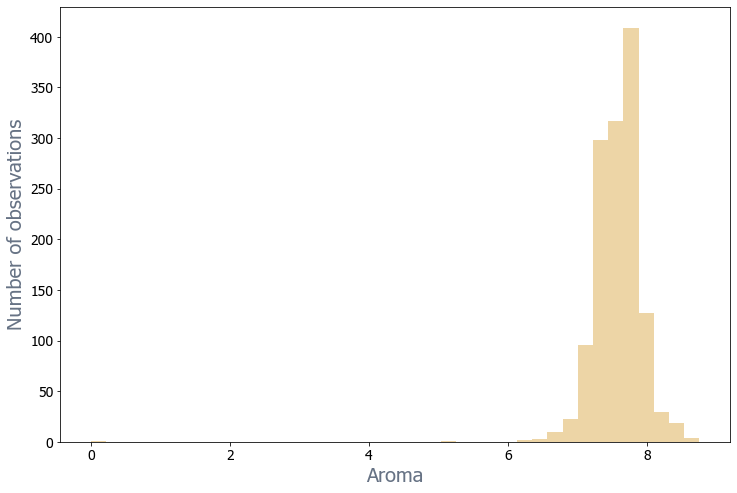

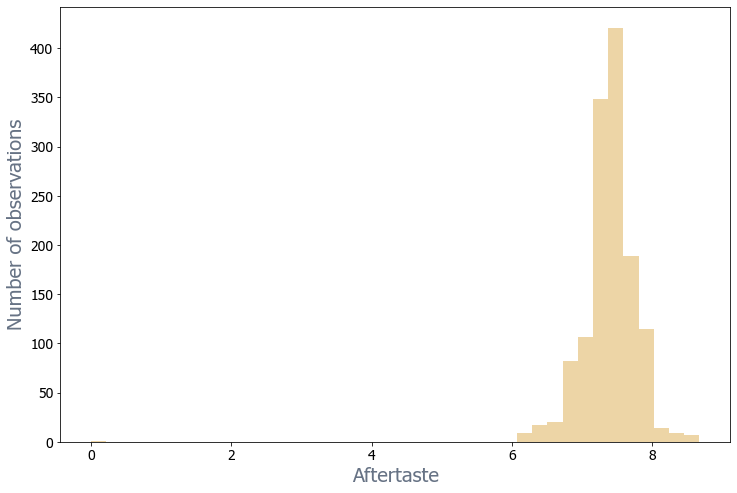

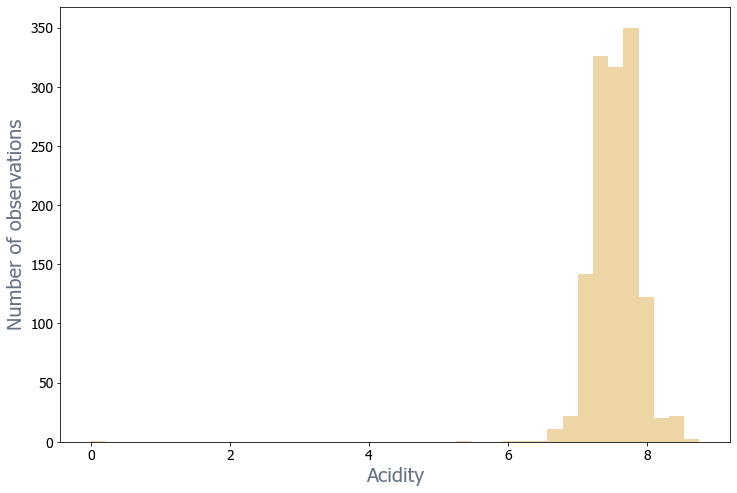

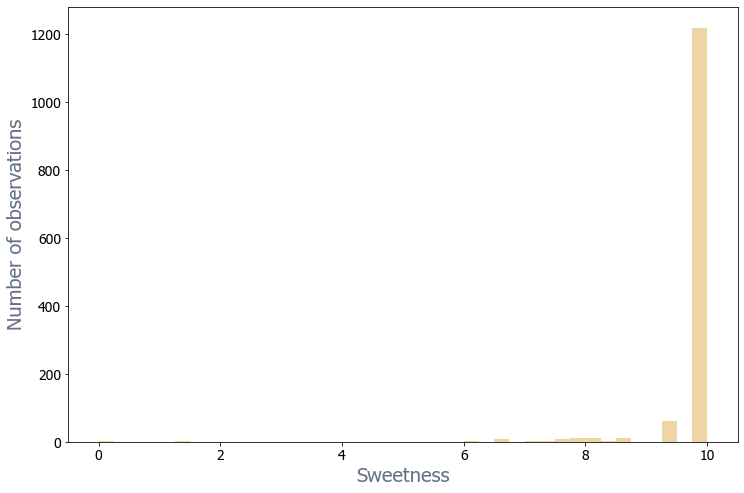

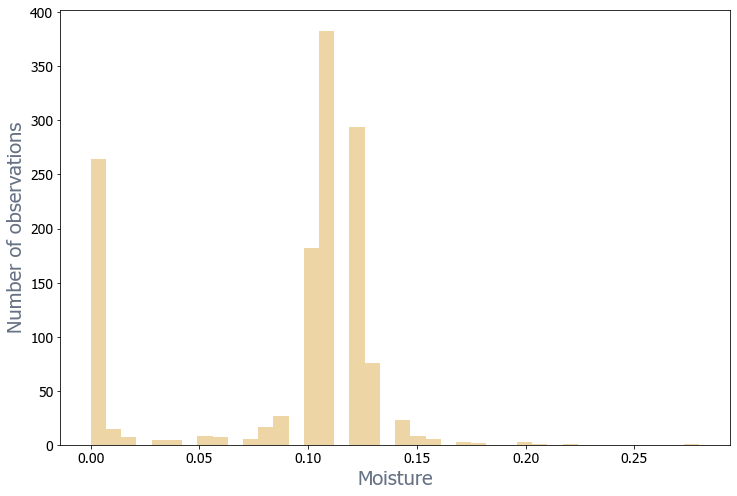

In [7]:
figs = []
for feat in features.columns:
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.hist([features[feat].values], bins=40)
    ax.set_xlabel(' '.join(feat.split('_')).capitalize())
    ax.set_ylabel('Number of observations')
    figs.append(fig)

## Model training

In [8]:
scaler = StandardScaler()
feature_scaler = scaler.fit(filtered_records[feature_names])
scaled_features = feature_scaler.transform(filtered_records[feature_names])
feature_scaler.mean_

array([7.5667065 , 7.4010829 , 7.53570575, 9.85669156, 0.08837939])

In [9]:
scaled_features.shape

(1339, 5)

### Plots

In [10]:
silhouette = []
inertia = []

# To capture model objects for each k
models = {}

# Upper bound for range of k to try 
kmax = 30
for k in range(2, kmax):  
    # Create model object
    model = KMeans(n_clusters=k, random_state=1218)
    
    # Train model object
    model.fit(scaled_features)
    
    # Get inertia calculated for trained model 
    inertia.append(model.inertia_)
    
    # Calculate silhouette score of trained model
    silhouette.append(sklearn.metrics.silhouette_score(scaled_features, model.labels_))
    
    # Capture trained model object 
    models[k] = model

#### Inertia plot

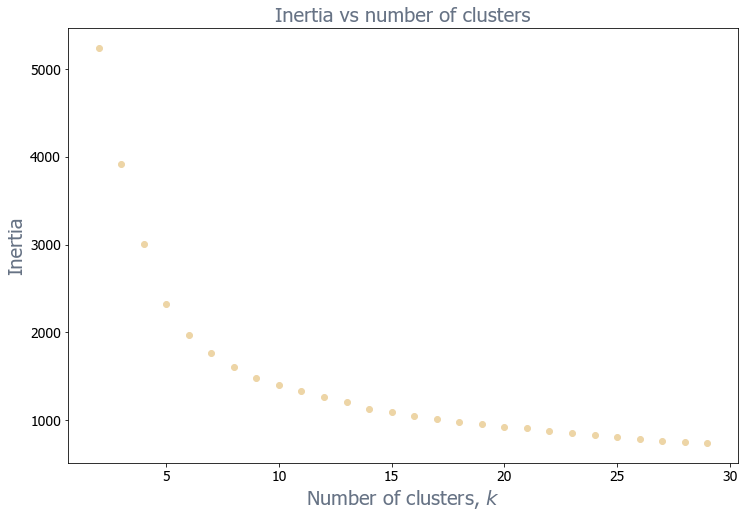

In [11]:
fig, ax = plt.subplots(figsize=(12,8));
ax.scatter(range(2,kmax), inertia);
ax.set_xlabel('Number of clusters, $k$');
ax.set_ylabel('Inertia');
ax.set_title('Inertia vs number of clusters');

#### Silhouette score

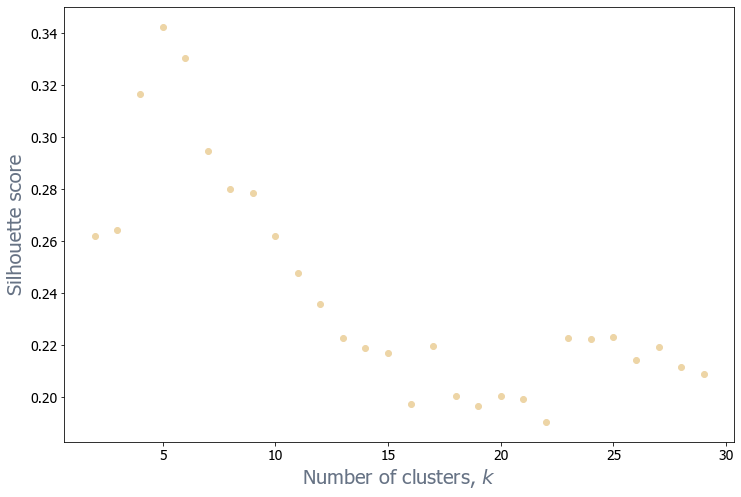

In [12]:
fig, ax = plt.subplots(figsize=(12,8));
ax.scatter(range(2,kmax), silhouette);
ax.set_xlabel('Number of clusters, $k$');
ax.set_ylabel('Silhouette score');

We choose k = 15 because it is close to the elbow of the inertia curve and produces a silhouette score that is better  than the surrounding choices of $k$.

## Model fitting

In [13]:
k_chosen = 5

In [14]:
model = KMeans(n_clusters=k_chosen, random_state=1218)

%timeit model.fit(scaled_features)

49.5 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
filtered_records['cluster'] = model.predict(scaled_features)

In [16]:
filtered_records

,id,Species,Country.of.Origin,Farm.Name,Company,Region,Producer,Grading.Date,Owner.1,Processing.Method,...,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Color,cluster
0,0,Arabica,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,"April 4th, 2015",metad plc,Washed / Wet,...,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,Green,4
1,1,Arabica,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,"April 4th, 2015",metad plc,Washed / Wet,...,8.58,8.42,8.42,10.00,10.00,10.00,89.92,0.12,Green,4
2,2,Arabica,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,"May 31st, 2010",Grounds for Health Admin,NaN,...,8.42,8.33,8.42,10.00,10.00,10.00,89.75,0.00,NaN,3
3,3,Arabica,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,"March 26th, 2015",Yidnekachew Dabessa,Natural / Dry,...,8.42,8.50,8.25,10.00,10.00,10.00,89.00,0.11,Green,4
4,4,Arabica,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,"April 4th, 2015",metad plc,Washed / Wet,...,8.50,8.42,8.33,10.00,10.00,10.00,88.83,0.12,Green,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,Ecuador,robustasa,robustasa,"san juan, playas",Café Robusta del Ecuador S.A.,"January 19th, 2016",Luis Robles,NaN,...,7.58,5.08,7.83,10.00,10.00,7.75,78.75,0.00,Blue-Green,1
1335,1335,Robusta,Ecuador,robustasa,robustasa,"san juan, playas",Café Robusta del Ecuador S.A.,"January 19th, 2016",Luis Robles,NaN,...,7.75,5.17,5.25,10.00,10.00,8.42,78.08,0.00,Blue-Green,1
1336,1336,Robusta,United States,fazenda cazengo,global opportunity fund,"kwanza norte province, angola",Cafe Cazengo,"December 23rd, 2014",James Moore,Natural / Dry,...,7.42,7.50,7.17,9.33,9.33,7.42,77.17,0.00,NaN,1
1337,1337,Robusta,India,NaN,cafe politico,NaN,NaN,"August 25th, 2014",Cafe Politico,Natural / Dry,...,7.17,7.25,7.00,9.33,9.33,7.08,75.08,0.10,Green,1


In [17]:
%timeit models[k_chosen].predict(scaled_features[0].reshape(1,-1))

255 µs ± 8.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%timeit models[k_chosen].predict(scaled_features)

339 µs ± 6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Evaluation

In [19]:
cluster_means = filtered_records.groupby('cluster')[feature_names].mean()

population_means = filtered_records[feature_names].mean()

lifts = cluster_means.divide(population_means)

### Lift plot

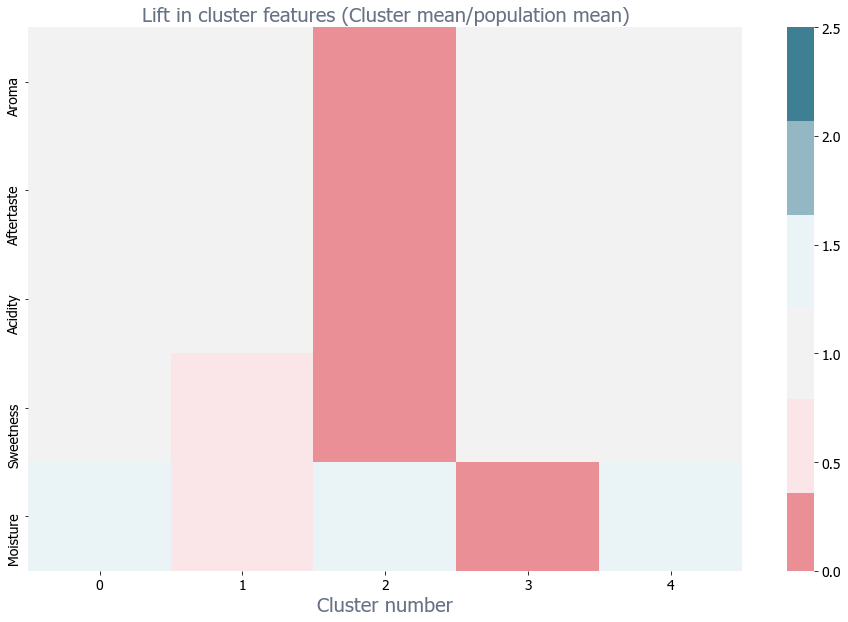

In [27]:
fig, ax = plt.subplots(figsize=(16, 10))

xticklabels = lifts.index.tolist() 
yticklabels = lifts.columns.tolist()

ax = sns.heatmap(lifts.T, center=1, vmax=2.5, cmap=sns.diverging_palette(10, 220, sep=80, n=7),
                xticklabels=xticklabels, yticklabels=yticklabels, );
ax.set_xlabel('Cluster number');
ax.set_title('Lift in cluster features (Cluster mean/population mean)');

### Cluster counts

In [28]:
training_counts = filtered_records.groupby('cluster').count()[['id']]
training_counts

,id
cluster,
0,461
1,50
2,1
3,269
4,558


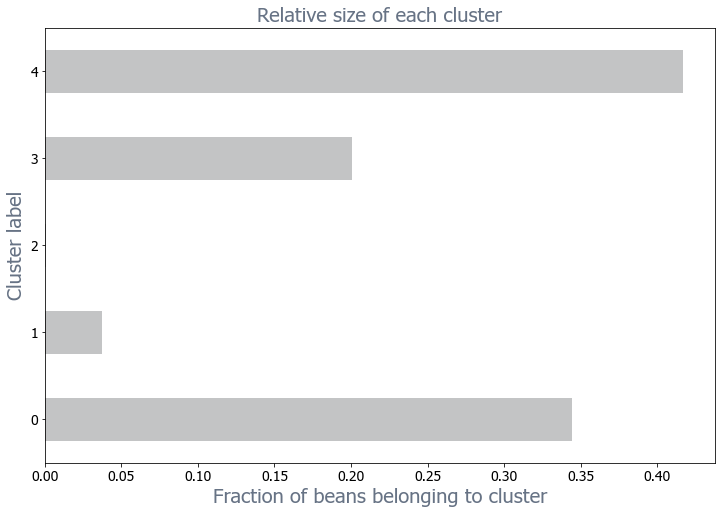

In [29]:
ax = training_counts.divide(len(filtered_records)).plot(kind="barh", color='#888b8d', alpha=0.5)
ax.set_xlabel("Fraction of beans belonging to cluster");
ax.set_ylabel("Cluster label");
ax.set_title("Relative size of each cluster");
ax.get_legend().remove()
fig = ax.get_figure()
fig.savefig("output.png")

In [30]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1218, tol=0.0001, verbose=0)